<a href="https://colab.research.google.com/github/siddharth101/Double_suspension/blob/main/Double_pendulum_combined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [44]:
from sympy import zeros, symbols
from sympy import eye, Matrix
import sympy.physics.mechanics as me
from sympy import expand
from sympy.parsing.sympy_parser import parse_expr
from sympy.physics.mechanics import Body, PinJoint, PrismaticJoint, JointsMethod, inertia
from sympy.physics.mechanics import dynamicsymbols
from sympy.physics.mechanics import dynamicsymbols, ReferenceFrame, outer
from sympy.physics.mechanics import ReferenceFrame, Point, RigidBody
from sympy.physics.mechanics import kinetic_energy, potential_energy, Point, Particle

import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

smp.init_printing(use_latex='mathjax')

In [45]:
!pip install control
import control
from sympy import Poly

### Setting up frames and points

In [82]:
q1, q2, q3, q4,  u1, u2, u3, u4, x_n1, x_n2, x_01, x_02 = dynamicsymbols('q1 q2 q3 q4 u1 u2 u3 u4 x_n1 x_n2 x_01 x_02')
M1, M2, k1, k2, d, d1, w1, d2, d3, w2, g, e, izz1, izz2, c1, c2, t = symbols('M1 M2 k1 k2 d d1 w1 d2 d3 w2 g e izz1 izz2 c1 c2 t')
T1, T2, T3, T4 = symbols('T1 T2 T3 T4')
gamma, alpha1, alpha2, beta1, beta2, omega1, omega2 = dynamicsymbols('gamma, alpha1, alpha2, beta1, beta2, omega1, omega2')

In [83]:


N = ReferenceFrame('N') # this is the global frame
N_a = ReferenceFrame('N_a') # this is the  frame of suspension point
A = ReferenceFrame('A') # this is the frame of the body
B = ReferenceFrame('B')

A.orient_axis(N, 0, N.z) # Initially A and N are parallel
B.orient_axis(N, 0, N.z) # Initially B and N are parallel
N_a.orient_axis(N, 0, N.z) # Initially N and N_a are parallel

In [84]:
O = Point('O')
P = Point('P')
P1 = Point('P1')
P2 = Point('P2')
X1 = Point('X1')
B1 = Point('B1')
B2 = Point('B2')
X2 = Point('X2')
C1 = Point('C1')
C2 = Point('C2')
D1 = Point('D1')
D2 = Point('D2')


X1a = Point('X1a')
X2a = Point('X2a')
B1a = Point('B1a')
B2a = Point('B2a')
C1a = Point('C1a')
C2a = Point('C2a')
D1a = Point('D1a')
D2a = Point('D2a')

In [49]:
def pos_vectors(point1, point2, frame):

    pos_vec = point1.pos_from(point2).express(frame)

    return pos_vec

In [50]:
def position_points(configuration=None):

  print("Running position points")


  P.set_pos(O, q1*N.x)
  X1.set_pos(P, -q2*N.y)

  # P1 and P2 are points on the cieling
  P1.set_pos(P, (-w1)*N_a.x + d*N_a.y)
  P2.set_pos(P, (+w1)*N_a.x + d*N_a.y)

  ## B1 and B2 are attachement points on the body1 connecting to P1 and P2
  B1.set_pos(X1, -w1*A.x + d1*A.y)
  B2.set_pos(X1, w1*A.x + d1*A.y)

  ## C1 and C2 are points on body1 connecting to body 2
  C1.set_pos(X1, -w2*A.x - d2*A.y )
  C2.set_pos(X1, w2*A.x - d2*A.y)

  # COM of Body2
  #X2.set_pos(P, -(q2 + e)*N.y)
  X2.set_pos(O, q3*N.x -q4*N.y)

  ## D1 on body2 connects to C1 on body1 and D2 on body2 connects to C2 on body1
  D1.set_pos(X2, -w2*B.x + d3*B.y)
  D2.set_pos(X2, w2*B.x + d3*B.y)


  global b1p1_a1, b2p2_a1, b1p1_b1, b2p2_b1, b1p1_n1, b2p2_n1
  global d1c1_a1, d2c2_a1, d1c1_b1, d2c2_b1, d1c1_n1, d2c2_n1

  b1p1_a1 = pos_vectors(B1, P1, A)
  b2p2_a1 = pos_vectors(B2, P2, A)
  b1p1_b1 = pos_vectors(B1, P1, B)
  b2p2_b1 = pos_vectors(B2, P2, B)
  b1p1_n1 = pos_vectors(B1, P1, N)
  b2p2_n1 = pos_vectors(B2, P2, N)


  d1c1_a1 = pos_vectors(D1, C1, A)
  d2c2_a1 = pos_vectors(D2, C2, A)
  d1c1_b1 = pos_vectors(D1, C1, B)
  d2c2_b1 = pos_vectors(D2, C2, B)
  d1c1_n1 = pos_vectors(D1, C1, N)
  d2c2_n1 = pos_vectors(D2, C2, N)

  return

### Initial setup has been defined, below functions will disturb the system

In [51]:
def move_points(configuration=None):
  print("Running move points")

  if configuration=='suspension_point':
    print("Running for suspension point motion")



    B1a.set_pos(B1, 0*A.x + 0*A.y)
    B2a.set_pos(B2, 0*A.x + 0*A.y)

    C1a.set_pos(C1, 0*A.x + 0*A.y)
    C2a.set_pos(C2, 0*A.x + 0*A.y)

    D1a.set_pos(D1, 0*B.x + 0*B.y)
    D2a.set_pos(D2, 0*B.x + 0*B.y)

    X1a.set_pos(X1, 0*N.x +0*N.y)
    X2a.set_pos(X2, 0*N.x + 0*N.y)


    ### Rotating the frame
    N_a.orient_axis(N, gamma, N.z)



  else:
    ### Translation of blocks

    X1a.set_pos(O, -q2*N.y + (x_n1+q1)*N.x)
    B1a.set_pos(X1a, -w1*A.x + d1*A.y)
    B2a.set_pos(X1a, w1*A.x + d1*A.y)
    C1a.set_pos(X1a, -w2*A.x - d2*A.y)
    C2a.set_pos(X1a, w2*A.x - d2*A.y)

    X2a.set_pos(O,  (x_n2+q3)*N.x -(q4)*N.y)
    D1a.set_pos(X2a, -w2*B.x + d3*B.y)
    D2a.set_pos(X2a, w2*B.x + d3*B.y)


  global b1ap1_a2, b2ap2_a2, b1ap1_b2, b2ap2_b2, b1ap1_n2, b2ap2_n2, d1ac1a_a2
  global d2ac2a_a2, d1ac1a_b2, d1ac1a_b2, d2ac2a_b2, d1ac1a_n2, d2ac2a_n2

  b1ap1_a2 = pos_vectors(B1a, P1, A)
  b2ap2_a2 = pos_vectors(B2a, P2, A)
  b1ap1_b2 = pos_vectors(B1a, P1, B)
  b2ap2_b2 = pos_vectors(B2a, P2, B)
  b1ap1_n2 = pos_vectors(B1a, P1, N)
  b2ap2_n2 = pos_vectors(B2a, P2, N)

  d1ac1a_a2 = pos_vectors(D1a, C1a, A)
  d2ac2a_a2 = pos_vectors(D2a, C2a, A)
  d1ac1a_b2 = pos_vectors(D1a, C1a, B)
  d2ac2a_b2 = pos_vectors(D2a, C2a, B)
  d1ac1a_n2 = pos_vectors(D1a, C1a, N)
  d2ac2a_n2 = pos_vectors(D2a, C2a, N)

  return

In [52]:
def rotate_blocks(configuration=None):

  print("Running rotate blocks")

  global b1ap1_a3, b2ap2_a3, b1ap1_b3, b2ap2_b3, b1ap1_n3, b2ap2_n3
  global d1ac1a_a3, d2ac2a_a3, d1ac1a_b3, d2ac2a_b3, d1ac1a_n3, d2ac2a_n3
  global d1ac1a_a4, d2ac2a_a4, d1ac1a_b4, d2ac2a_b4, d1ac1a_n4, d2ac2a_n4

  A.orient_axis(N, alpha1-beta1, N.z)


  b1ap1_a3 = pos_vectors(B1a, P1, A)
  b2ap2_a3 = pos_vectors(B2a, P2, A)

  b1ap1_b3 = pos_vectors(B1a, P1, B)
  b2ap2_b3 = pos_vectors(B2a, P2, B)

  b1ap1_n3 = pos_vectors(B1a, P1, N)
  b2ap2_n3 = pos_vectors(B2a, P2, N)


  d1ac1a_a3 = pos_vectors(D1a, C1a, A)
  d2ac2a_a3 = pos_vectors(D2a, C2a, A)

  d1ac1a_b3 = pos_vectors(D1a, C1a, B)
  d2ac2a_b3 = pos_vectors(D2a, C2a, B)

  d1ac1a_n3 = pos_vectors(D1a, C1a, N)
  d2ac2a_n3 = pos_vectors(D2a, C2a, N)

  B.orient_axis(N, alpha2-beta2, N.z)

  d1ac1a_a4 = D1a.pos_from(C1a).express(A)
  d2ac2a_a4 = D2a.pos_from(C2a).express(A)

  d1ac1a_b4 = D1a.pos_from(C1a).express(B)
  d2ac2a_b4 = D2a.pos_from(C2a).express(B)

  d1ac1a_n4 = D1a.pos_from(C1a).express(N)
  d2ac2a_n4 = D2a.pos_from(C2a).express(N)

  return

### Tensions

In [53]:
def tensions(configuration=None):

  print("Running tensions")

  global dirT1, dirT2, dirT3, dirT4, T1, T2, T3, T4, delta_l1, delta_l2
  global delta_l3, delta_l4



  delta_l1, delta_l2, delta_l3, delta_l4 = symbols('delta_l1 delta_l2 delta_l3 delta_l4')

  T1 = smp.Rational(1,2)*(M1 + M2)*g + k1*delta_l1
  T2 = smp.Rational(1,2)*(M1 + M2)*g - k1*delta_l2
  T3 = smp.Rational(1,2)*(M2*g) - k2*delta_l3
  T4 = smp.Rational(1,2)*(M2*g) + k2*delta_l4


  dirT1 = -b1ap1_a3/b1ap1_a3.magnitude()
  dirT2 = -b2ap2_a3/b2ap2_a3.magnitude()
  dirT3 = -d1ac1a_b4/d1ac1a_b4.magnitude()
  dirT4 = -d2ac2a_b4/d2ac2a_b4.magnitude()

  return

### Creating body and applying the forces

In [54]:
def create_blocks(configuration=None):

  print("Running create blocks")

  global block1, block2
  IB = inertia(A, 0, 0, izz1)

  block1 = Body('C1', X1a, mass=M1, frame=A, central_inertia=IB)
  block1.frame.set_ang_vel(N, omega1*N.z)
  X1a.set_vel(N, u1*N.x + u2*N.y)

  ### Creating the body in frame B with Mass M2 and center of mass X2a
  IB2 = inertia(B, 0, 0, izz2)
  block2 = Body('C2', X2a, mass=M2, frame=B, central_inertia=IB2)
  block2.frame.set_ang_vel(N, omega2*N.z)
  X2a.set_vel(N, u3*N.x + u4*N.y)


  block1.apply_force(T1*dirT1, point=B1a)
  block1.apply_force(T2*dirT2, point=B2a)
  block1.apply_force(-T3*dirT3, point=C1a)
  block1.apply_force(-T4*dirT4, point=C2a)
  block2.apply_force(T3*dirT3, point=D1a)
  block2.apply_force(T4*dirT4, point=D2a)

  block1.apply_force(-(M1 + M2)*g*N.y.express(A), point=X1a)
  block2.apply_force(-(M2)*g*N.y.express(B), point=X2a)

  return

### Solving kanes equations

In [55]:
def solve_kane(configuration=None):

  print("Running solve kane")

  if configuration=='suspension_point':
    print("Running for suspension point motion")

    kane = me.KanesMethod(N, q_ind=[q1, q2, alpha1, q3, q4, alpha2],
                      u_ind = [u1, u2, omega1, u3, u4, omega2],
                      kd_eqs=[u1-q1.diff(t), u2 + q2.diff(t), omega1 - alpha1.diff(t), u3 - q3.diff(t), u4 + q4.diff(t),  omega2 - alpha2.diff(t)])

    kaneeq = kane.kanes_equations([block1, block2], [block1.loads[0], block1.loads[1], block1.loads[2], block1.loads[3], block1.loads[4],
                                                 block2.loads[0], block2.loads[1], block2.loads[2]])


  else:

    kane = me.KanesMethod(N, q_ind=[x_n1, q2, alpha1, x_n2, q4, alpha2],
                      u_ind = [u1, u2, omega1, u3, u4, omega2],
                      kd_eqs=[u1-x_n1.diff(t), u2 + q2.diff(t), omega1 - alpha1.diff(t), u3 - x_n2.diff(t), u4 + q4.diff(t),  omega2 - alpha2.diff(t)])
    kaneeq = kane.kanes_equations([block1, block2], [block1.loads[0], block1.loads[1], block1.loads[2], block1.loads[3], block1.loads[4],
                                                 block2.loads[0], block2.loads[1], block2.loads[2]])

  return kane, kaneeq

### Linearzing

In [56]:
def linearize_(kane=None,configuration=None):

  print("Running linearize")

  if configuration=='suspension_point':
    print("Running for suspension point motion")
    kanel = kane.to_linearizer()
    A_mat, B_mat = kanel.linearize(A_and_B=True, op_point={alpha1:beta1, alpha2:beta2, gamma:0, q3:q1})

  else:
     kanel = kane.to_linearizer()
     A_mat, B_mat = kanel.linearize(A_and_B=True, op_point={alpha1:beta1, alpha2:beta2, x_n1:0, x_n2:0, q1:q3})

  return A_mat, B_mat


In [74]:
def simplify_A_B(A_mat=None, B_mat=None):

  print("simplify A B")

  global l1, l2

  l1, l2 = symbols('l1 l2', positive=True)

  A_mat = A_mat.subs({-d + d1 - q2:-l1, d2 + d3 + q2 - q4: -l2})#.subs({-d + d1 - q2:-l1, expand((d2 + d3 + q2 - q4)**2): l2**2}) #d2 + d3 - e:-l2})
  A_mat.simplify()

  A_mat_ = A_mat.subs({delta_l1:delta_l2, delta_l3:delta_l4})
  A_mat_.simplify()

  A_mat_a = A_mat.subs({delta_l1:0, delta_l2:0, delta_l3:0, delta_l4:0})
  A_mat_a.simplify()

  B_mat = B_mat.subs({-d + d1 - q2:-l1, d2 + d3 + q2 - q4: -l2})#.subs({-d + d1 - q2:-l1, expand((d2 + d3 + q2 - q4)**2): l2**2})
  B_mat.simplify()

  B_mat_ = B_mat.subs({delta_l1:delta_l2, delta_l3:delta_l4})
  B_mat_.simplify()

  B_mat_a = B_mat.subs({delta_l1:0, delta_l2:0, delta_l3:0, delta_l4:0})
  B_mat_a.simplify()

  return A_mat, A_mat_, A_mat_a, B_mat, B_mat_, B_mat_a

### Functions to check the correctness of A and B matrices

In [59]:
def check_b_mat(component_kane=0,input_component=x_01, component_b_mat=6, input_ind=2):

  kanes_val = kaneeq[0][component_kane].diff(input_component).subs({alpha1:beta1, alpha2:beta2, gamma:0, x_n1:0, x_n2:0, q1:q3}).subs({delta_l1:delta_l2, delta_l3:delta_l4,
                                                                                         d1 - q2:-l1,d2 + d3 + q2 - q4: -l2 }).simplify()
  B_mat_val = B_mat[component_b_mat, input_ind].subs({delta_l1:delta_l2, delta_l3:delta_l4,d1 - q2:-l1, d2 + d3 + q2 - q4: -l2, q1:q3}).simplify()
  mass_torque_dict = {0:M1, 1:M1, 2:izz1, 3:M2, 4:M2, 5:izz2}

  diff = (kanes_val/mass_torque_dict[component_kane] - B_mat_val).simplify()

  return diff, kanes_val, B_mat_val

In [51]:
#check_b_mat(0, beta1, 6, 0) # Fx on Top mass

In [52]:
#check_b_mat(0, beta2, 6, 1) # Fx on Top mass

In [53]:
#check_b_mat(0, q1, 6, 2) # Fx on Top mass

In [54]:
#check_b_mat(0, q3, 6, 3) # Fx on Top mass

In [55]:
#check_b_mat(2, beta1, 8, 0) # Torque on Top mass

In [60]:
def check_A_mat(component_kane=0,input_component=x_n1, component_a_mat=6, input_ind=0):

  kanes_val = kaneeq[0][component_kane].diff(input_component).subs({alpha1:beta1, alpha2:beta2, gamma:0, x_n1:0, x_n2:0, q1:q3}).subs({delta_l1:delta_l2, delta_l3:delta_l4,d1 - q2:-l1,
                                                                                                                       d2 + d3 + q2 - q4:-l2}).simplify()
  A_mat_val = A_mat[component_a_mat, input_ind].subs({delta_l1:delta_l2, delta_l3:delta_l4,d1 - q2:-l1, d2 + d3 + q2 - q4:-l2, q1:q3}).simplify()
  force_dict = {0:'horizontal F Mass 1', 1:'Vertical Force Mass 1',
                2:'Torque Mass 1', 3:'Horizontal Force Mass 2',
                4:'Vertical Force Mass 2', 5:'Torque Mass 2'}


  mass_torque_dict = {0:M1, 1:M1, 2:izz1, 3:M2, 4:M2, 5:izz2}

  diff = (kanes_val/mass_torque_dict[component_kane] - A_mat_val).simplify()



  return diff, kanes_val, A_mat_val

In [57]:
#check_A_mat(0, x_n1, 6, 0) # Fx on top mass

In [58]:
#check_A_mat(0, x_n2, 6, 3) # Fx on top mass

In [59]:
#check_A_mat(0, alpha1, 6, 2) # Fx on top mass

In [60]:
#check_A_mat(0, alpha2, 6, 5) # Fx on top mass

### Transfer function matrix

In [61]:
def get_tf_matrix(A=None, B=None):

  s = symbols('s')
  si = s*eye(A.shape[0])

  sia = si - A
  sia.simplify()
  sia_ = sia.subs({q2 - q4 + d2 + l2:-d3, -d2 - q2 + q4: l2 + d3})

  print("Getting the determinant")
  sia_det_ = sia_.det()
  sia_adj_ = sia_.adjugate()

  sia_inv = sia_adj_/sia_det_

  sia_inv_B_ = sia_inv*B


  return sia_inv_B_

### Obtaining transfer functions

In [62]:
def get_tfs(sia_B_matrix=None, configuration=None):

  print("Running get_tfs")

  if configuration=='suspension_point':
    print("Running for suspoint motion")


    tf_pt_lt = sia_B_matrix[0,0] # Beta1 to q1
    tf_pb_lt = sia_B_matrix[0,1] # Beta2 to q1
    tf_psus_lt = sia_B_matrix[0,2] # Gamma to q1

    tf_pt_pt = sia_B_matrix[2,0] # Beta1 to alpha1
    tf_pb_pt = sia_B_matrix[2,1] # Beta2 to alpha1
    tf_psus_pt = sia_B_matrix[2,2] # Gamma to alpha1

    tf_pt_lb = sia_B_matrix[3,0] # Beta1 to q3
    tf_pb_lb = sia_B_matrix[3,1] # Beta2 to q3
    tf_psus_lb = sia_B_matrix[3,2] # Gamma to q3

    tf_pt_pb = sia_B_matrix[5,0] # Beta1 to alpha2
    tf_pb_pb = sia_B_matrix[5,1] # Beta2 to alpha2
    tf_psus_pb = sia_B_matrix[5,2] # Gamma to alpha2
    #print(tf_pt_lt)

    tf_dict = {'pt_lt':tf_pt_lt, 'pb_lt':tf_pb_lt, 'psus_lt':tf_psus_lt,
               'pt_pt':tf_pt_pt, 'pb_pt': tf_pb_pt, 'psus_pt':tf_psus_pt,
               'pt_lb': tf_pt_lb, 'pb_lb': tf_pb_lb, 'psus_lb':tf_psus_lb,
               'pt_pb': tf_pt_pb, 'pb_pb': tf_pb_pb, 'psus_pb': tf_psus_pb}




  else:

    tf_pt_lt = sia_B_matrix[0,0].simplify()  # P top to L top
    tf_pb_lt = sia_B_matrix[0,1].simplify()  # P bottom to L top
    tf_lt_lt = sia_B_matrix[0,2].simplify()  # L top to L top
    tf_lb_lt = sia_B_matrix[0,3].simplify()  # L bottom to L top

    tf_pt_pt = sia_B_matrix[2,0].simplify()  # P top to P top
    tf_pb_pt = sia_B_matrix[2,1].simplify()  # P bottom to P top
    tf_lt_pt = sia_B_matrix[2,2].simplify()  # L top to P top
    tf_lb_pt = sia_B_matrix[2,3].simplify()  # L bottom to P top

    tf_pt_lb = sia_B_matrix[3,0].simplify()  # P top to L bottom
    tf_pb_lb = sia_B_matrix[3,1].simplify()  # P bottom to L bottom
    tf_lt_lb = sia_B_matrix[3,2].simplify()  # L top to L bottom
    tf_lb_lb = sia_B_matrix[3,3].simplify()  # L bottom to L bottom

    tf_pt_pb = sia_B_matrix[5,0].simplify()  # P top to P bottom
    tf_pb_pb = sia_B_matrix[5,1].simplify()  # P bottom to P bottom
    tf_lt_pb = sia_B_matrix[5,2].simplify()  # L top to P bottom
    tf_lb_pb = sia_B_matrix[5,3].simplify()  # L bottom to P bottom

    tf_dict = {'pt_lt': tf_pt_lt, 'pb_lt': tf_pb_lt, 'lt_lt': tf_lt_lt, 'lb_lt':tf_lb_lt,
               'pt_pt': tf_pt_pt, 'pb_pt': tf_pb_pt, 'lt_pt': tf_lt_pt, 'lb_pt': tf_lb_pt,
               'pt_lb': tf_pt_lb, 'pb_lb': tf_pb_lb, 'lt_lb': tf_lt_lb, 'lb_lb': tf_lb_lb,
               'pt_pb': tf_pt_pb, 'pb_pb': tf_pb_pb, 'lt_pb': tf_lt_pb, 'lb_pb': tf_lb_pb}



  return tf_dict

### Plotting transfer functions

In [64]:
def plot_tfs(motion='pt_lb', tf_dict=None, damping=False, configuration=None, flow=0.1, fhigh=100, points=500):

  tf_key = motion

  tf_ = tf_dict[tf_key]
  #print(tf_)

  motion_dict = {'pt':'pitch top', 'pb':'pitch bottom', 'lt':'length top',
                 'lb':'length bottom', 'psus':'pitch suspension point'}


  tf_val = tf_.evalf(subs={M1:2.88, M2:2.662, d1:0.02275, d:0.011, d2:0.015, d3:0.001, l1:0.311, l2:0.3, q2:l1 -d + d1, q4:l1 -d + d1 + d2 + l2 + d3,
                            g:9.8, izz1:0.00981984, izz2:0.00499125}) #e:d2 + l2 + d3

  tf_val = tf_val.evalf(subs={d2:0.015, d3:0.001, izz1:0.00981984, izz2:0.00499125})

  print("Generating transfer function for {}  to  {}".format(motion_dict[motion.split('_')[0]], motion_dict[motion.split('_')[1]]))


  num_coeffs, den_coeffs = Poly(tf_val.as_numer_denom()[0]).all_coeffs(), Poly(tf_val.as_numer_denom()[-1]).all_coeffs()
  if damping:
    den_coeffs[-2] = 1e-5
  #print(den_coeffs)


  s = symbols('s')
  tf_val_ = Poly(num_coeffs, s)/Poly(den_coeffs, s)


  freq = np.geomspace(flow, fhigh, points)
  H = control.tf(np.array(num_coeffs, dtype=float), np.array(den_coeffs, dtype=float))
  #mag, phase, omega = control.bode(H, omega=freq, dB=False, deg=True, Hz=True, wrap_phase)
  control.bode_plot(H, omega=freq, dB=False, deg=True, Hz=True, wrap_phase=True)
  #plt.label(motion)
  #plt.legend('pt_lb')

  return tf_val_.simplify()

In [43]:
control.bode_plot?

### Combining all the functions

In [81]:
def generate_tfs(configuration=None):



  position_points()

  if configuration=='suspension_point':
    move_points(configuration='suspension_point')
  else:
    move_points()

  rotate_blocks()
  tensions()
  create_blocks()

  if configuration=='suspension_point':
    kane, kaneeq = solve_kane(configuration='suspension_point')
    A_mat, B_mat = linearize_(kane=kane, configuration='suspension_point')
  else:
    kane, kaneeq = solve_kane()
    A_mat, B_mat = linearize_(kane=kane)

  A_mat, A_mat_, A_mat_a, B_mat, B_mat_, B_mat_a = simplify_A_B(A_mat=A_mat, B_mat=B_mat)

  sia_inv_B_a = get_tf_matrix(A=A_mat_a, B=B_mat_a)


  if configuration=='suspension_point':
    tfs_sia_B = get_tfs(sia_B_matrix=sia_inv_B_a, configuration='suspension_point')
  else:
    tfs_sia_B = get_tfs(sia_B_matrix=sia_inv_B_a)

  return tfs_sia_B, sia_inv_B_a


In [27]:
# ### I can convert this matrix to a pandas dataframe and save as a csv file
# import pandas as pd
# df = pd.DataFrame([[sia_inv_B_a[i,j] for i in range(12)] for j in range(4)]).T

In [44]:
# df.head()

In [46]:
#!mkdir suspension_files

In [45]:
# df.to_csv('/content/suspension_files/sia_inv_B_a.csv', index=None)

In [ ]:
## Now this file can be read in a dataframe and converted back to matrix form
# df_ = pd.read_csv('/content/suspension_files/sia_inv_B_a.csv')
# sia_inv_B_a_df = Matrix([[parse_expr(df_.iloc[i,j]) for i in range(12)] for j in range(4)])

In [46]:
# ### Getting the transfer functions from the inverse matrix
# tfs_sia_inv_B_a = get_tfs(sia_B_matrix=sia_inv_B_a)

In [47]:
# ### Plotting the transfer functions
# freq = np.geomspace(0.1, 100, 500)
# plot_tfs(motion='pt_lt', tf_dict=tfs_sia_inv_B_a)

In [48]:
# plot_tfs(motion='pb_pt', tf_dict=tfs_sia_inv_B_a)

### Generating transfer functions for suspension point motion

In [69]:
tfs_sia_inv_B_a_sus = generate_tfs(configuration='suspension_point')[0]

Running position points
Running move points
Running for suspension point motion
Running rotate blocks
Running tensions
Running create blocks
Running solve kane
Running for suspension point motion
Running linearize
Running for suspension point motion
simplify A B
Getting the determinant
Running get_tfs
Running for suspoint motion


In [70]:
tfs_sia_inv_B_a_sus.keys()

dict_keys(['pt_lt', 'pb_lt', 'psus_lt', 'pt_pt', 'pb_pt', 'psus_pt', 'pt_lb', 'pb_lb', 'psus_lb', 'pt_pb', 'pb_pb', 'psus_pb'])

In [71]:
tfs_sia_inv_B_a_sus['psus_pb']

                                                                              
                                                                              
                                                                              
                                                                              
                                                                              
                                                                              
                                                                M₁⋅d⋅d₁⋅g⋅izz₂
                                                                              
                                                                              
- ────────────────────────────────────────────────────────────────────────────
    ⎛  2           2  2  4     2             3  2     2             2     4   
  s⋅⎝M₁ ⋅M₂⋅d⋅d₁⋅d₃ ⋅g ⋅s  + M₁ ⋅M₂⋅d⋅d₁⋅d₃⋅g ⋅s  + M₁ ⋅M₂⋅d⋅d₁⋅d₃⋅g ⋅l₂⋅s  + 

              ⎛                                    

### Generating transfer function for blocks pitch and translation


*   Before generating the transfer functions for another configuration, run the three cells below **Setting up frames and points**



In [85]:
tfs_sia_inv_B_a_ = generate_tfs()[0]

Running position points
Running move points
Running rotate blocks
Running tensions
Running create blocks
Running solve kane
Running linearize
simplify A B
Getting the determinant
Running get_tfs


In [87]:
tfs_sia_inv_B_a_.keys()

dict_keys(['pt_lt', 'pb_lt', 'lt_lt', 'lb_lt', 'pt_pt', 'pb_pt', 'lt_pt', 'lb_pt', 'pt_lb', 'pb_lb', 'lt_lb', 'lb_lb', 'pt_pb', 'pb_pb', 'lt_pb', 'lb_pb'])

### Plotting the transfer functions

Generating transfer function for pitch top  to  length top


                  2 ⎛                       4                         2       
                 s ⋅⎝- 1.22032283157316e-5⋅s  - 0.000657589285627473⋅s  - 0.00
──────────────────────────────────────────────────────────────────────────────
                     8                        6                      4        
1.31700634217856e-5⋅s  + 0.00402495409537519⋅s  + 0.330321928779041⋅s  + 5.942

               ⎞                 
310197727816971⎠                 
─────────────────────────────────
             2                   
48653814804⋅s  + 22.5899064785837

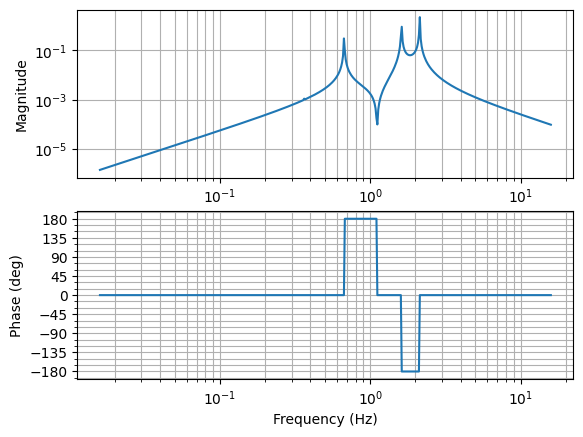

In [96]:
### Plotting the transfer functions
plot_tfs(motion='pt_lt', tf_dict=tfs_sia_inv_B_a_)

Generating transfer function for pitch suspension point  to  pitch bottom


                    10                        8                         7     
1.8139031553482e-9⋅s   + 7.78304171927887e-7⋅s  + 7.13950568683591e-25⋅s  + 0.
──────────────────────────────────────────────────────────────────────────────
                                       2 ⎛                      12            
                                      s ⋅⎝1.73450570533855e-10⋅s   + 8.4982659

                    6                         5                        4      
000104358596624819⋅s  + 1.74901177341944e-22⋅s  + 0.00425761212438039⋅s  + 8.8
──────────────────────────────────────────────────────────────────────────────
            10                        8                        6              
3819766e-8⋅s   + 1.47221673644457e-5⋅s  + 0.00107679577862225⋅s  + 0.031773202

                   3                       2                                  
7606239300739e-21⋅s  + 0.0195070085384564⋅s  + 4.17051712796347e-20⋅s + 5.1247
──────────────────────────────────────────────────

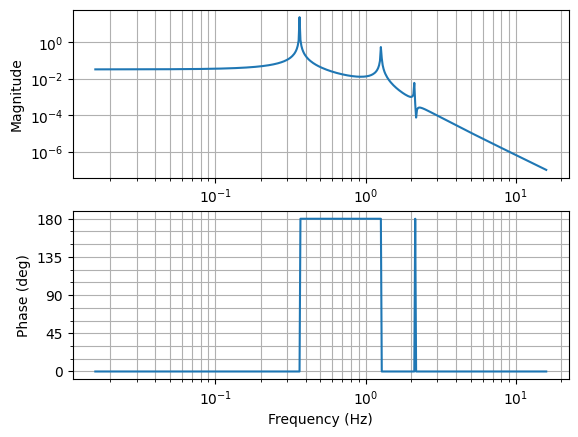

In [97]:
### Plotting the transfer functions
plot_tfs(motion='psus_pb', tf_dict=tfs_sia_inv_B_a_sus, configuration='suspension_point')

Generating transfer function for pitch suspension point  to  pitch bottom


                    10                        8                         7     
1.8139031553482e-9⋅s   + 7.78304171927887e-7⋅s  + 7.13950568683591e-25⋅s  + 0.
──────────────────────────────────────────────────────────────────────────────
                                       2 ⎛                      12            
                                      s ⋅⎝1.73450570533855e-10⋅s   + 8.4982659

                    6                         5                        4      
000104358596624819⋅s  + 1.74901177341944e-22⋅s  + 0.00425761212438039⋅s  + 8.8
──────────────────────────────────────────────────────────────────────────────
            10                        8                        6              
3819766e-8⋅s   + 1.47221673644457e-5⋅s  + 0.00107679577862225⋅s  + 0.031773202

                   3                       2                                  
7606239300739e-21⋅s  + 0.0195070085384564⋅s  + 4.17051712796347e-20⋅s + 5.1247
──────────────────────────────────────────────────

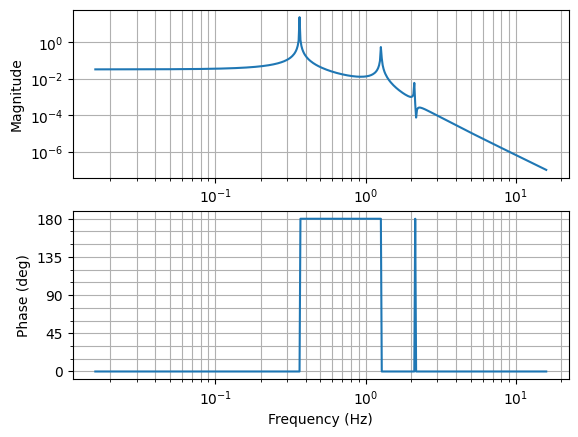

In [98]:
### Plotting the transfer functions
plot_tfs(motion='psus_pb', tf_dict=tfs_sia_inv_B_a_sus, configuration='suspension_point')

### Plotting all the transfer functions for suspension point pitch motion

Generating transfer function for pitch top  to  length top
Generating transfer function for pitch bottom  to  length top
Generating transfer function for pitch suspension point  to  length top
Generating transfer function for pitch top  to  pitch top
Generating transfer function for pitch bottom  to  pitch top
Generating transfer function for pitch suspension point  to  pitch top
Generating transfer function for pitch top  to  length bottom
Generating transfer function for pitch bottom  to  length bottom
Generating transfer function for pitch suspension point  to  length bottom
Generating transfer function for pitch top  to  pitch bottom
Generating transfer function for pitch bottom  to  pitch bottom
Generating transfer function for pitch suspension point  to  pitch bottom


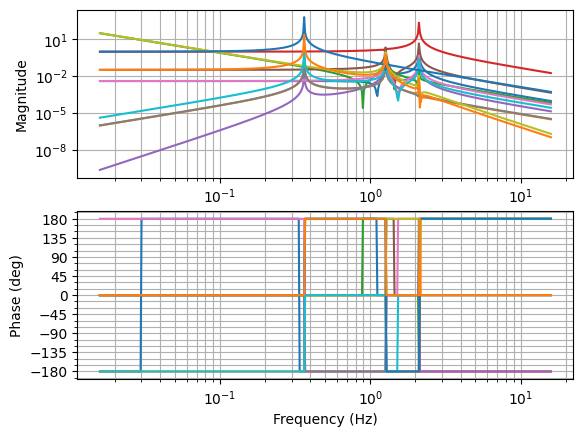

In [99]:
for i in tfs_sia_inv_B_a_sus.keys():
  plot_tfs(motion=i, tf_dict=tfs_sia_inv_B_a_sus, configuration='suspension_point')

### Plotting all the transfer functions for blocks pitch and translation

Generating transfer function for pitch top  to  length top
Generating transfer function for pitch bottom  to  length top
Generating transfer function for length top  to  length top
Generating transfer function for length bottom  to  length top
Generating transfer function for pitch top  to  pitch top
Generating transfer function for pitch bottom  to  pitch top
Generating transfer function for length top  to  pitch top
Generating transfer function for length bottom  to  pitch top
Generating transfer function for pitch top  to  length bottom
Generating transfer function for pitch bottom  to  length bottom
Generating transfer function for length top  to  length bottom
Generating transfer function for length bottom  to  length bottom
Generating transfer function for pitch top  to  pitch bottom
Generating transfer function for pitch bottom  to  pitch bottom
Generating transfer function for length top  to  pitch bottom
Generating transfer function for length bottom  to  pitch bottom


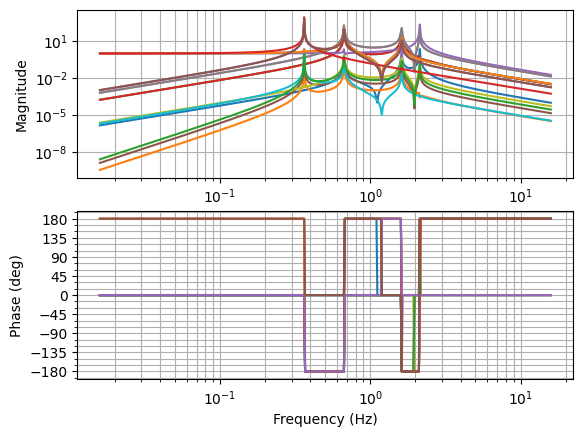

In [100]:
for i in tfs_sia_inv_B_a_.keys():
  plot_tfs(motion=i, tf_dict=tfs_sia_inv_B_a_)

In [ ]:
# with tf.device(device_name):
#   import time
#   tic = time.time()
#   sia_det = sia.det()
#   sia_adj = sia.adjugate()
#   tac = time.time()
#   print(tac-tic)


#   # sia_det_ = sia_.det()
#   # sia_adj_ = sia_.adjugate()

#   #sia_det_a = sia_a.det()
#   #sia_adj_a = sia_a.adjugate()

#   sia_inv = sia_adj/sia_det
#   # sia_inv_ = sia_adj_/sia_det_
#   #sia_inv_a = sia_adj_a/sia_det_a

In [36]:
# sia_inv_B = sia_inv*B_mat_
# #sia_inv_B_ = sia_inv_*B_mat_
# #sia_inv_B_a = sia_inv_a*B_mat_a

In [37]:
# #sia_inv_B.shape
# #sia_inv_B_.shape
# sia_inv_B_a.shape

In [49]:
# import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# if len(device_name) > 0:
#     print("Found GPU at: {}".format(device_name))
# else:
#     device_name = "/device:CPU:0"
#     print("No GPU, using {}.".format(device_name))